# Chameleon Cast - Iteration 6: Character Reference Sheet

## The Solution to Iteration 4's Problem

**Iteration 4 Failed Because:**
- Each frame converted independently
- No consistency between frames
- Characters looked completely different

**Iteration 6 Solution:**
- Generate a master character design sheet FIRST
- Use it as reference for ALL frame conversions
- Force consistency across entire video

**Character:** Animated golden retriever wearing sports clothes

**Pipeline:**
```
Step 1: Generate character reference sheet (model sheet)
Step 2: Extract all frames from video
Step 3: For each frame:
        - Pass character reference + current frame to Gemini
        - "Match this character, apply to this pose"
Step 4: Stitch frames → video
Step 5: Compare with Iteration 4
```

In [ ]:
!pip install -q -U google-generativeai
!pip install opencv-python-headless pillow matplotlib

In [ ]:
import google.generativeai as genai
from google.colab import userdata, files as colab_files
from google import genai as genai_client
from google.genai import types
import time
import json
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import subprocess
import os
from tqdm import tqdm

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
client = genai_client.Client(api_key=GOOGLE_API_KEY)

## Configuration

In [ ]:
# CONFIGURATION
FRAME_SKIP = 7  # Extract every Nth frame (3 = every 3rd frame for 8fps)
RATE_LIMIT_DELAY = 5  # Seconds between API calls

print(f"Configuration:")
print(f"  Frame skip: {FRAME_SKIP}")
print(f"  Rate limit delay: {RATE_LIMIT_DELAY}s")
print(f"\nCharacter: Animated golden retriever in sports clothes")

Configuration:
  Frame skip: 7
  Rate limit delay: 5s

Character: Animated golden retriever in sports clothes


## Step 1: Upload Your Video

In [ ]:
# Upload video file
print("Please upload your video file:")
uploaded = colab_files.upload()

# Get the uploaded filename
video_filename = list(uploaded.keys())[0]
print(f"\n✅ Uploaded: {video_filename}")

# Rename to video.mp4 for consistency
!mv "{video_filename}" video.mp4
print("Renamed to video.mp4")

Please upload your video file:


Saving video (7) (online-video-cutter.com).mp4 to video (7) (online-video-cutter.com).mp4

✅ Uploaded: video (7) (online-video-cutter.com).mp4
Renamed to video.mp4


In [ ]:
# Get video info
cap = cv2.VideoCapture('video.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

frames_to_process = total_frames // FRAME_SKIP
output_fps = fps / FRAME_SKIP

print(f"\n📹 Video Information:")
print(f"  Resolution: {width}x{height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")
print(f"  Duration: {duration:.2f}s")
print(f"\n📊 Processing Plan:")
print(f"  Frames to process: {frames_to_process}")
print(f"  Output FPS: {output_fps:.2f}")
print(f"  Estimated time: ~{(frames_to_process * RATE_LIMIT_DELAY) / 60:.1f} minutes")


📹 Video Information:
  Resolution: 1080x1920
  FPS: 60.0
  Total frames: 1554
  Duration: 25.90s

📊 Processing Plan:
  Frames to process: 222
  Output FPS: 8.57
  Estimated time: ~18.5 minutes


## Step 2: Generate Character Reference Sheet

This is the KEY innovation - we create a master character design that will be used for ALL frames.

In [ ]:
print("🎨 Generating character reference sheet...\n")

# Extract a representative frame from the video
cap = cv2.VideoCapture('video.mp4')
cap.set(cv2.CAP_PROP_POS_MSEC, 3000)  # 3 seconds in
success, frame = cap.read()
cap.release()

if success:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    reference_frame = Image.fromarray(frame_rgb)
    reference_frame.save('reference_source_frame.png')
    print("✅ Extracted reference frame from video")
else:
    print("❌ Could not extract frame")

🎨 Generating character reference sheet...

✅ Extracted reference frame from video


In [ ]:
# Character model sheet prompt
character_sheet_prompt = """
Create a professional CHARACTER MODEL SHEET for animation production.

Character: Friendly animated GOLDEN RETRIEVER playing sports

Physical Description:
- Golden retriever with fluffy golden/cream colored fur
- Athletic build, standing upright on two legs
- Wearing a blue sports jersey with white trim
- White shorts
- White athletic shoes
- Friendly, expressive face with big eyes

Style: Pixar/Disney 3D animation style - smooth, appealing, high quality render

IMPORTANT LAYOUT:
Create a SINGLE IMAGE showing this character from MULTIPLE ANGLES in a row:
- Front view (facing camera directly)
- 3/4 view (slightly turned)
- Side view (profile)
- Back view

All views should show the character in a neutral standing pose.
Clean white background.
Make sure the character looks EXACTLY THE SAME in all views - same colors, same proportions, same clothing.

This is a turnaround sheet for animators to maintain character consistency.
"""

print("Generating character model sheet with Gemini 3 Pro Image...")
print("This may take 30-60 seconds...\n")

# Generate character reference sheet
response = client.models.generate_content(
    model='gemini-3-pro-image-preview',
    contents=[character_sheet_prompt],
    config=types.GenerateContentConfig(
        response_modalities=['IMAGE'],
        image_config=types.ImageConfig(
            aspect_ratio='16:9',
            image_size='2K'
        )
    )
)

# Extract and save character sheet
for part in response.parts:
    if part.inline_data is not None:
        character_sheet = part.as_image()
        character_sheet.save('character_reference_sheet.png')
        print("✅ Character reference sheet generated!")
        break

# Display the character sheet
print("\n📋 Character Reference Sheet:")
display(character_sheet)
print("\nThis character design will be used for ALL frames to maintain consistency.")

Generating character model sheet with Gemini 3 Pro Image...
This may take 30-60 seconds...

✅ Character reference sheet generated!

📋 Character Reference Sheet:


Image(
  image_bytes=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xeb\x17fJP\x00\x01\x00\x00\x00\x01\x00\x00\x17\\jumb\x00\x00\x00\x1ejumdc2pa\x00\x11\x00\x10\x80\x00\x00\xaa\x008\x9bq\x03c2pa\x00\x00\x00\x176jumb\x00\x00\x00Gjumdc2ma\x00\x11\x00\x10\x80\x00\x00...',
  mime_type='image/jpeg'
)


This character design will be used for ALL frames to maintain consistency.


## Step 3: Extract All Frames

Extracting every 7rd frame...

✅ Extracted 222 frames
   Saved to frames_original/


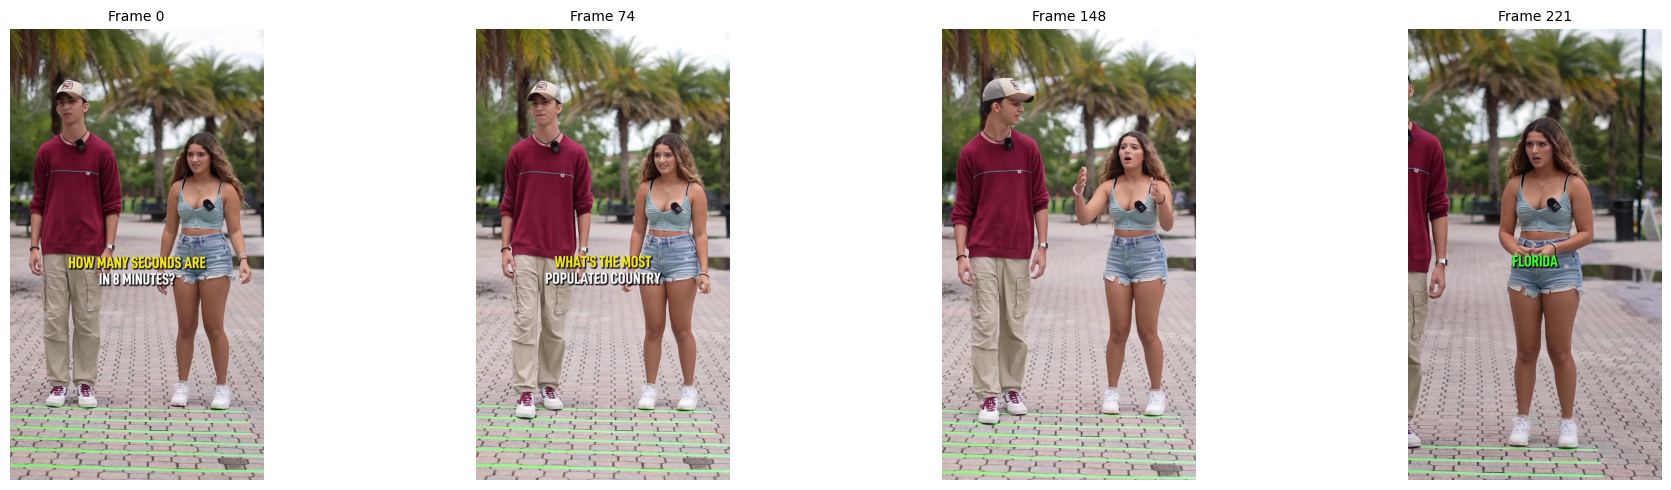

In [ ]:
# Create directories
os.makedirs('frames_original', exist_ok=True)
os.makedirs('frames_animated', exist_ok=True)

print(f"Extracting every {FRAME_SKIP}rd frame...\n")

cap = cv2.VideoCapture('video.mp4')
frame_count = 0
saved_count = 0
frame_indices = []

while True:
    success, frame = cap.read()
    if not success:
        break

    if frame_count % FRAME_SKIP == 0:
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(frame_rgb)
        pil_image.save(f'frames_original/frame_{saved_count:04d}.png')
        frame_indices.append(frame_count)
        saved_count += 1

    frame_count += 1

cap.release()

print(f"✅ Extracted {saved_count} frames")
print(f"   Saved to frames_original/")

# Display sample frames
sample_indices = [0, saved_count//3, 2*saved_count//3, saved_count-1]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, idx in enumerate(sample_indices):
    img = Image.open(f'frames_original/frame_{idx:04d}.png')
    axes[i].imshow(img)
    axes[i].set_title(f'Frame {idx}', fontsize=10)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Step 4: Convert Frames with Character Reference

**This is where the magic happens!**

Each frame is converted by passing:
1. The character reference sheet (for consistent design)
2. The current frame (for pose/composition)

Gemini combines both: "Use this character design, apply to this pose"

In [ ]:
# Load character reference sheet
character_ref = Image.open('character_reference_sheet.png')

# Frame conversion prompt
frame_conversion_prompt = """
Convert this video frame to animated style using the CHARACTER REFERENCE SHEET provided.

CRITICAL INSTRUCTIONS:
1. Look at the CHARACTER REFERENCE SHEET (the model sheet with multiple views)
2. Use the EXACT SAME golden retriever character design from the reference
3. Match ALL details from the reference:
   - Same golden fur color
   - Same blue jersey with white trim
   - Same white shorts
   - Same facial features and proportions
   - Same animation style (Pixar/Disney 3D)

4. Apply this character to the POSE shown in the current video frame
5. Keep the camera angle, composition, and background from the video frame
6. Maintain spatial relationships and positions

The character MUST look identical to the reference sheet.
ONLY the pose should change to match the current frame.

Generate a high-quality Pixar-style animated frame.
"""

print(f"\n🎨 Converting {saved_count} frames with character reference...")
print(f"⏱️  Estimated time: ~{(saved_count * RATE_LIMIT_DELAY) / 60:.1f} minutes\n")
print("💡 TIP: This will take a while. You can close this tab and come back later.\n")

converted_count = 0
skipped_count = 0
start_time = time.time()

for i in tqdm(range(saved_count), desc="Converting frames"):
    output_path = f'frames_animated/frame_{i:04d}.png'

    # Skip if already converted (resume capability)
    if os.path.exists(output_path):
        skipped_count += 1
        continue

    # Load original frame
    original_frame = Image.open(f'frames_original/frame_{i:04d}.png')

    try:
        # Convert frame with character reference
        response = client.models.generate_content(
            model='gemini-3-pro-image-preview',
            contents=[
                frame_conversion_prompt,
                character_ref,    # Character reference sheet
                original_frame    # Current frame to convert
            ],
            config=types.GenerateContentConfig(
                response_modalities=['IMAGE'],
                image_config=types.ImageConfig(
                    aspect_ratio='16:9',
                    image_size='2K'
                )
            )
        )

        # Save animated frame
        for part in response.parts:
            if part.inline_data is not None:
                animated_image = part.as_image()
                animated_image.save(output_path)
                converted_count += 1
                break

        # Rate limit delay
        if i < saved_count - 1:  # Don't sleep after last frame
            time.sleep(RATE_LIMIT_DELAY)

    except Exception as e:
        print(f"\n❌ Error on frame {i}: {e}")
        print(f"Saving progress and stopping...")
        break

elapsed_time = time.time() - start_time

print(f"\n✅ Conversion complete!")
print(f"   Converted: {converted_count} frames")
print(f"   Skipped (already done): {skipped_count} frames")
print(f"   Total time: {elapsed_time / 60:.1f} minutes")
if converted_count > 0:
    print(f"   Average per frame: {elapsed_time / converted_count:.1f}s")


🎨 Converting 222 frames with character reference...
⏱️  Estimated time: ~18.5 minutes

💡 TIP: This will take a while. You can close this tab and come back later.



Converting frames:  14%|█▎        | 30/222 [00:00<00:05, 37.04it/s]


❌ Error on frame 30: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_requests_per_model_per_day, limit: 0', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_requests_per_model_per_day', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel'}]}]}}
Saving progress and stopping...

✅ Conversion complete!
   Converted: 0 frames
   Skipped (already done): 30 frame

## Step 5: Preview Results

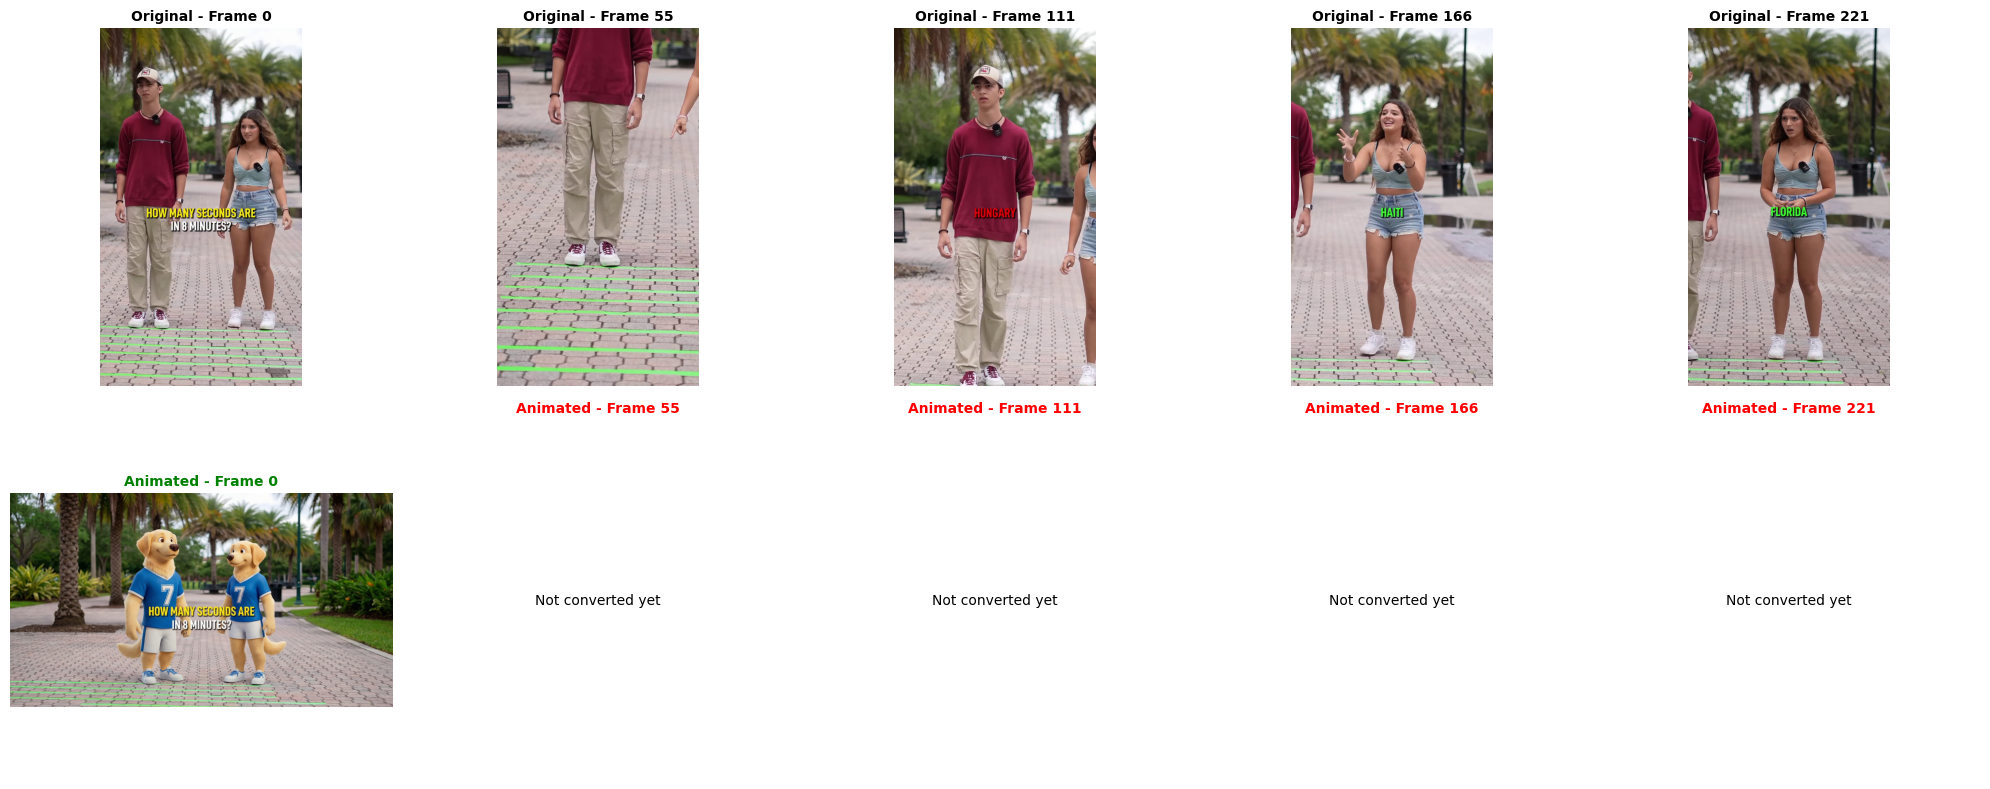


💡 Check for:
  ✅ Character looks the SAME across all frames (golden retriever, blue jersey)
  ✅ Poses match the original frames
  ✅ Consistent animation style
  ✅ Much better than Iteration 4 (random characters)


In [ ]:
# Display comparison of sample frames
sample_indices = [0, saved_count//4, saved_count//2, 3*saved_count//4, saved_count-1]

fig, axes = plt.subplots(2, len(sample_indices), figsize=(4*len(sample_indices), 8))

for i, idx in enumerate(sample_indices):
    # Original
    orig = Image.open(f'frames_original/frame_{idx:04d}.png')
    axes[0, i].imshow(orig)
    axes[0, i].set_title(f'Original - Frame {idx}', fontsize=10, fontweight='bold')
    axes[0, i].axis('off')

    # Animated with character reference
    if os.path.exists(f'frames_animated/frame_{idx:04d}.png'):
        anim = Image.open(f'frames_animated/frame_{idx:04d}.png')
        axes[1, i].imshow(anim)
        axes[1, i].set_title(f'Animated - Frame {idx}', fontsize=10, fontweight='bold', color='green')
    else:
        axes[1, i].text(0.5, 0.5, 'Not converted yet', ha='center', va='center')
        axes[1, i].set_title(f'Animated - Frame {idx}', fontsize=10, fontweight='bold', color='red')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Check for:")
print("  ✅ Character looks the SAME across all frames (golden retriever, blue jersey)")
print("  ✅ Poses match the original frames")
print("  ✅ Consistent animation style")
print("  ✅ Much better than Iteration 4 (random characters)")

## Step 6: Stitch Frames into Video

In [ ]:
print("Stitching frames into video...\n")

output_filename = "iteration6_output.mp4"

# Use ffmpeg to create video from image sequence
cmd = [
    'ffmpeg',
    '-framerate', str(output_fps),
    '-i', 'frames_animated/frame_%04d.png',
    '-c:v', 'libx264',
    '-pix_fmt', 'yuv420p',
    '-preset', 'slow',
    '-crf', '18',
    output_filename,
    '-y'
]

result = subprocess.run(cmd, capture_output=True, text=True)

if result.returncode == 0:
    print(f"✅ Video created: {output_filename}")
    print(f"   Output FPS: {output_fps:.2f}")
    print(f"   Duration: ~{duration:.2f}s")
else:
    print(f"❌ ffmpeg error: {result.stderr}")